<a href="https://colab.research.google.com/github/nosgueira/PLN-2022-1/blob/main/Atividade08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 8: inferência de Linguagem Natural

- Aluno: Gabriel da Silva Corvino Nogueira (180113330)

## Imports

In [4]:
import tensorflow_datasets as tfds
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical



## Carregamento de Dados

In [5]:
df_train = tfds.load('snli', split='train[50%:]',shuffle_files=True )
df_train = tfds.as_dataframe(df_train)
df_valid = tfds.load('snli', split='validation',shuffle_files=False )
df_valid = tfds.as_dataframe(df_valid)
df_test = tfds.load('snli', split='test',shuffle_files=False )
df_test = tfds.as_dataframe(df_test)

In [6]:
texts_train = [p.decode('utf-8')+' '+h.decode('utf-8') for h,p in zip(df_train.premise,
                                                                  df_train.hypothesis)]
df_train = pd.DataFrame({'text':texts_train, 'label':df_train.label})

texts_valid = [p.decode('utf-8')+' '+h.decode('utf-8') for h,p in zip(df_valid.premise,
                                                                      df_valid.hypothesis)]
df_valid = pd.DataFrame({'text':texts_valid, 'label':df_valid.label})

texts_test = [p.decode('utf-8')+' '+h.decode('utf-8') for h,p in zip(df_test.premise,
                                                                      df_test.hypothesis)]
df_test = pd.DataFrame({'text':texts_test, 'label':df_test.label})

In [7]:
df_train

,text,label
0,A child reaches up. a child reaches up into th...,0
1,A person with a backpack A young woman wearing...,0
2,A man holding a hard hat is running. A man hol...,0
3,A female in weird clothing holding a glass. Wo...,0
4,There are bikers. A group of bikers head out t...,0
...,...,...
275071,A woman is holding flowers. A woman waits to c...,0
275072,People are dancing. Women dancing in bright co...,0
275073,There is a woman doing art. A woman wearing a ...,0
275074,a boy is playing with some toys at the park A ...,1


In [8]:
y_train = to_categorical(df_train.label)
y_valid = to_categorical(df_valid.label)
y_test  = to_categorical(df_test.label)

## Numericalização

In [9]:
vocab_size = 2000

In [10]:
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(df_train['text'])

In [11]:
train_sequences = tokenizer.texts_to_sequences(df_train['text'])

## Pós-processamento da numericalização

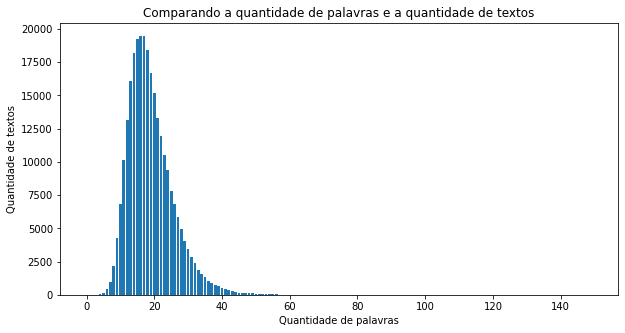

In [12]:
max_bound = 150
hist = {}
hist['bins'] = list(range(max_bound))

counts = [0]*max_bound
for x in train_sequences:
    counts[len(x)]+=1
hist['counts'] = counts

fig = plt.figure(figsize=(10, 5))
plt.bar(hist['bins'], hist['counts'])

plt.xlabel("Quantidade de palavras")
plt.ylabel("Quantidade de textos")
plt.title("Comparando a quantidade de palavras e a quantidade de textos")
plt.show()


In [13]:
max_length = 60

In [14]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')

In [15]:
valid_sequences = tokenizer.texts_to_sequences(df_valid['text'])
test_sequences = tokenizer.texts_to_sequences(df_test['text'])

valid_padded = pad_sequences(valid_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded  = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

## Rede Neural Recorrente (RNN)

In [2]:
from keras.layers import Input, Dense, SimpleRNN, Embedding, Dropout, Bidirectional, LSTM
from keras.models import Sequential

In [16]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim = 32, input_length=max_length))
model.add(SimpleRNN(64, activation='relu', return_sequences=True))
model.add(Dropout(0.5))
model.add(SimpleRNN(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 32)            64000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 60, 64)            6208      
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 73,411
Trainable params: 73,411
Non-trai

In [ ]:
sgd = SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
history_fine = model.fit(train_padded, y_train, validation_data=(valid_padded, y_valid), epochs=30)

Epoch 1/30
8597/8597 [==============================] - 936s 109ms/step - loss: 1.0987 - accuracy: 0.3353 - val_loss: 1.0986 - val_accuracy: 0.3330
Epoch 2/30
8597/8597 [==============================] - 932s 108ms/step - loss: 1.0987 - accuracy: 0.3337 - val_loss: 1.0993 - val_accuracy: 0.3234
Epoch 3/30
8597/8597 [==============================] - 937s 109ms/step - loss: 1.0987 - accuracy: 0.3326 - val_loss: 1.0988 - val_accuracy: 0.3235
Epoch 4/30
8597/8597 [==============================] - 945s 110ms/step - loss: 1.0987 - accuracy: 0.3328 - val_loss: 1.0987 - val_accuracy: 0.3329
Epoch 5/30
8597/8597 [==============================] - 941s 109ms/step - loss: 1.0986 - accuracy: 0.3349 - val_loss: 1.0984 - val_accuracy: 0.3437
Epoch 6/30
8597/8597 [==============================] - 937s 109ms/step - loss: 1.0987 - accuracy: 0.3346 - val_loss: 1.0985 - val_accuracy: 0.3436
Epoch 7/30
8597/8597 [==============================] - 940s 109ms/step - loss: 1.0986 - accuracy: 0.3347 - val_

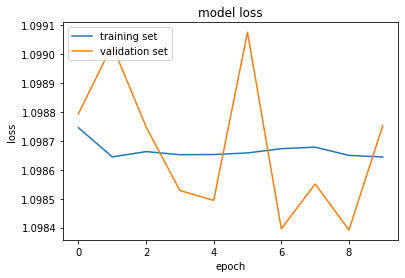

In [ ]:
plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

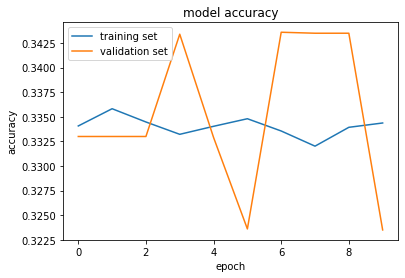

In [ ]:
plt.plot(history_fine.history['accuracy'])
plt.plot(history_fine.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [ ]:
import numpy as np

y_prob = model.predict(test_padded)
y_pred = np.argmax(y_prob,axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df_test['label'],y_pred))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       176
           0       0.00      0.00      0.00      3368
           1       0.32      1.00      0.49      3219
           2       0.00      0.00      0.00      3237

    accuracy                           0.32     10000
   macro avg       0.08      0.25      0.12     10000
weighted avg       0.10      0.32      0.16     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## BiLSTM

In [17]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim = 32, input_length=max_length))
model.add(Bidirectional(LSTM(10, activation='relu', return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(10, activation='relu')))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
history_fine = model.fit(train_padded, y_train, validation_data=(valid_padded, y_valid), epochs=10)

Epoch 1/10
8597/8597 [==============================] - 3324s 386ms/step - loss: 12.7356 - accuracy: 0.5119 - val_loss: 0.9142 - val_accuracy: 0.5777
Epoch 2/10
8597/8597 [==============================] - 3285s 382ms/step - loss: 1.2522 - accuracy: 0.5574 - val_loss: 0.8744 - val_accuracy: 0.5907
Epoch 3/10
8597/8597 [==============================] - 3283s 382ms/step - loss: 0.9091 - accuracy: 0.5751 - val_loss: 0.8659 - val_accuracy: 0.6095
Epoch 4/10
7741/8597 [==========================>...] - ETA: 5:24 - loss: 0.8900 - accuracy: 0.5899

Modelo não pode terminar de ser treinado devido a limitações da plataforma

In [ ]:
plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_fine.history['accuracy'])
plt.plot(history_fine.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show(

In [ ]:
import numpy as np

y_prob = model.predict(test_padded)
y_pred = np.argmax(y_prob,axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df_test['label'],y_pred))
